# **Projet CENSE**

# Import Libraries

In [1]:
#importing libraries
import os
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# Preprocessing

In [2]:
#set directory for source files 
data_dir = '/gdrive/My Drive/Colab Notebooks/scenes_stereo/' 

audio_files = glob(data_dir + '*.wav') # stores the path files with extension .wav from the data_dir directory. (we have 100 files wih this extension, so its path gets stored. )
print('file size:',len(audio_files))
print('data_dir file:',data_dir)
print('audio file:',audio_files) 

file size: 100
data_dir file: /gdrive/My Drive/Colab Notebooks/scenes_stereo/
audio file: ['/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus03.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus05.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus02.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus04.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus10.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus07.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet02.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus09.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet04.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus08.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet03.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus06.wav', '/gdrive/My Drive/Colab Notebooks/scenes_

In [3]:
data_list = glob(data_dir + "/*") # stores the path of all the files from the data_dir directory.
data = []
print('datalist file:',data_list)

all_labels = {'bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation'} 

for name in all_labels:
    for k in range(1,10):
        data.append(lr.feature.mfcc(lr.load(data_dir+name + '0'+str(k)+'.wav')[0],n_mfcc = 40)) #load returns two values,audio time series and its sampling rate, we want only audio time series for mfcc, therefore we call as [0]. 
    data.append(lr.feature.mfcc(lr.load(data_dir+name + '10'+'.wav')[0],n_mfcc = 40)) #  and then mfcc() returns 40 coefficients

#the mel-frequency cepstrum is a representation of the short-term power spectrum of a sound on a nonlinear mel scale of frequency
#if n_mfcc = 60, we get an array of size 60 x 1292

#data[90].shape

datalist file: ['/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus03.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus05.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus02.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus04.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus10.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus07.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet02.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus09.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet04.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus08.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet03.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus06.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/office01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/offic

In [4]:
data[0].shape

(40, 1292)

In [5]:
np.mean(data[0],axis=1).shape #takes the mean of each row since axis=1, therefore we get an output of 40 rows with each row containing mean of 1292 columns

#example: 
# # 2D array  
# arr = [[14, 17, 12, 33, 44],   
#        [15, 6, 27, 8, 19],  
#        [23, 2, 54, 1, 4, ]]  
    
# # mean of the flattened array  
# print("\nmean of arr, axis = None : ", np.mean(arr))  
    
# # mean along the axis = 0  
# print("\nmean of arr, axis = 0 : ", np.mean(arr, axis = 0))  
   
# # mean along the axis = 1  
# print("\nmean of arr, axis = 1 : ", np.mean(arr, axis = 1)) 

# OUTPUT:
# mean of arr, axis = None :  18.6

# mean of arr, axis = 0 :  [17.33333333  8.33333333 31.         14.         22.33333333]

# mean of arr, axis = 1 :  [24.  15.  16.8]

(40,)

In [6]:
labels = [] # Labels of samples
for k in range(10):
    labels = labels+[k]*10 # in the directory each label contains 10 audio files, therefore its labels has same value 
#print('labels: ',labels)  

dict_labels = {'bus':0,'busystreet':1,'office':2,'openairmarket':3,'park':4,'quietstreet':5,'restaurant':6,'supermarket':7,'tube':8,'tubestation':9} 

#k;dict_labels.get('openairmarket') 


# Texture window

In [7]:
def wind_texture(M,wsize):
    """Compute the time averages of the texture windows in an MFCC matrix.

     M: MFCC matrix in Quefrence x time format
     wsize: Number of frames retained in the window"""

    n,m = M.shape
    #print(n,m)
    nwind = m//wsize # floored quotient of x and y
    #print(nwind)
    W = np.zeros((n,nwind)) 
    
    for i in range (nwind):
        W[:,i] = np.mean(M[:,i*wsize:(i+1)*wsize],axis=1) #suppose first data of size 40 X 1029 is stored in M. We store all the row with index from i*winsize to i+1 * winsize (in first case 0 to 21 values are taken and averaged) and take its mean and store in the W vector
         # ie. for each line for each value of i, we get a window of size 21(for first case) , we takes its mean and store it in i.
         # draw a figure and show
    
    return(W)
    

# RbQ-c Approximate

In [8]:
def dist_wind_approximate(A,B,wsize): #finds similarity between two scenes
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    #print(np.shape(x))
    n,m = np.shape(x) #40 x 61 in case of first
    distxy = np.zeros((m,1))
    
    for k in range(m):
        distxy[k] = np.linalg.norm(x[:,k]-y[:,k]) #computes norm of x[] and y[]

    return min(distxy) #takes the min value from distxy

In [9]:
def p_at_k(mat_dist,K=5,labels=labels):
    p5 = np.zeros(100)
    for k in range(100):
        dist = mat_dist[k,:] #1x100
        #print(np.shape(dist))
        distsort = np.argsort(np.ravel(dist)) #np.ravel() Returns a contiguous flattened array and is sorted usin argsort i.e 2D becomes 1D array here
        #print(np.shape(distsort))
        p5[k] = np.sum([labels[distsort[i]]==labels[k] for i in range(1,K+1)])/K #counting the number of items of the same class within the k closest neighbors
        #print(p5)
    return(np.mean(p5)) # averaging over all query items


In [10]:
# def p_at_k(mat_dist,K=5,labels=labels):
#     p5 = np.zeros(100)
#     for k in range(100):
#         dist = mat_dist[k,:] #1x100
#         #print(np.shape(dist))
#         distsort = np.argsort(np.ravel(dist)) #np.ravel() Returns a contiguous flattened array and is sorted usin argsort i.e 2D becomes 1D array here
#         labels_dummy = np.zeros(K+1)
#         #print(np.shape(distsort))
#         for i in range(1,K+1):
#             if (labels[distsort[i]]==labels[k]):
#               labels_dummy[i] = labels[distsort[i]]
#         p5[k] = np.sum(labels_dummy)/K #counting the number of items of the same class within the k closest neighbors
#     print(p5)
#     return(np.mean(p5)) # averaging over all query items


In [11]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))                # 100 X 100 matrix seq_size times
precision = np.zeros((len(seq_size),9))
num = 0

#RBQ technique to find neighbour and perform p@k for different window sizes
for n, windsize in enumerate(seq_size): #n is the index and windsize is the value from the seq_size
    for i in range(100): 
        for j in range(i,100): #j=i to 100
            mat_dist[n, i,j] = dist_wind_approximate(data[i],data[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]  # since it is a symmetric matrix, its transpose also has same value.

    for k in range(1,10): #for k=1 to 9 since each class has only 10 items
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)


# 1)mat_dist = np.zeros((3, 5,5))

# for i in range(5): 
#         for j in range(i,5): #j=i to 100
#             mat_dist[0, i,j] =2+i
        

# print(mat_dist)
# [[[2. 2. 2. 2. 2.]
#   [0. 3. 3. 3. 3.]
#   [0. 0. 4. 4. 4.]
#   [0. 0. 0. 5. 5.]
#   [0. 0. 0. 0. 6.]]       distance from one data ement to all other data element needs to be found.  It'll be a symmetric matrix. We calculate the upper triangular matrix. 

#  2)precision = np.zeros((5,9))

# print(precision)
# [[0. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

# 3)
#for n, windsize in enumerate(seq_size):
#     print(n,windsize)
    
# (0, 21)
# (1, 43)
# (2, 86)
# (3, 172)
# (4, 344)

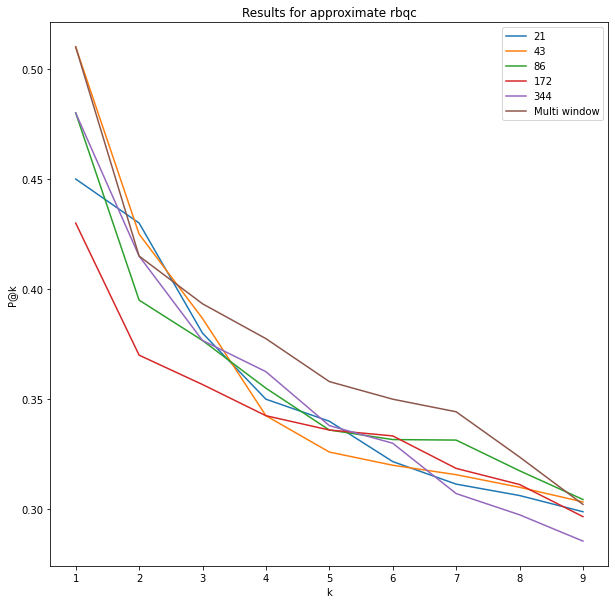

In [12]:
#RBQ for multi-window technique.
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

#plots 
plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for approximate rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [13]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])


for window size =  21
k=   4 0.3400000000000001
for window size =  43
k=   4 0.32600000000000007
for window size =  86
k=   4 0.3360000000000001
for window size =  172
k=   4 0.3360000000000001
for window size =  344
k=   4 0.338
For multi 
k= 5  0.3580000000000001


# RbQ-c Complete

In [14]:
def dist_wind(A,B,wsize):
    
    x = wind_texture(A,wsize)
    #print('x',np.shape(x))
    y = wind_texture(B,wsize)
    #print('y',np.shape(y))
    n,m = np.shape(x)
    distxy = np.float('Inf')
    #print(distxy)
    for k in range(m):
        #print("first",distxy)
        distxy = min(distxy, min(np.linalg.norm(np.transpose(y)-x[:,k], axis=1))) # ydim = 61x40 and xdim= 40x1
                                                                                  #all row of y with each row of x 's norm
        #print("second ",distxy,k)
        #print("min val", min(np.linalg.norm(np.transpose(y)-x[:,k], axis=1)))
    return distxy

In [15]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0

for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind(data[i],data[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

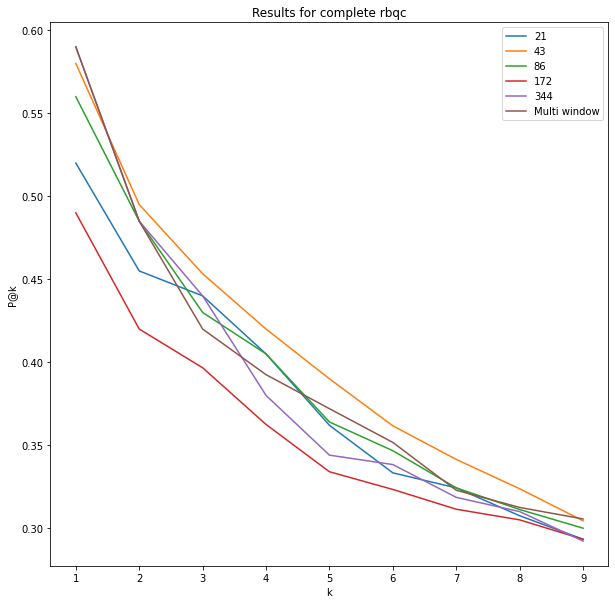

In [16]:

precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
    
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for complete rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [17]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])


for window size =  21
k=   4 0.3620000000000001
for window size =  43
k=   4 0.39000000000000007
for window size =  86
k=   4 0.3640000000000001
for window size =  172
k=   4 0.3340000000000001
for window size =  344
k=   4 0.3440000000000001
For multi 
k= 5  0.3720000000000001


# Early Integration

In [18]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precisionEarly= np.zeros(9)

for i in range(100):
   for j in range(i,100):
       mat_dist[n, i,j] = np.linalg.norm(np.sum(data[i], axis=1)
                                            - np.sum(data[j], axis=1))
       mat_dist[n, j,i] = mat_dist[n, i,j]

for k in range(1,10):
  precisionEarly[k-1] = p_at_k(mat_dist.sum(axis=0),k)

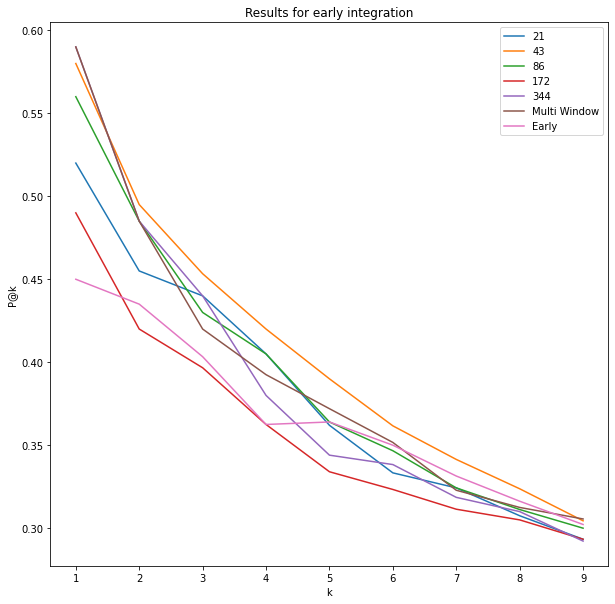

In [19]:
plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
    
plt.plot(range(1,10),precisionMult,label = 'Multi Window')
plt.plot(range(1,10),precisionEarly,label = 'Early')
plt.title('Results for early integration')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [20]:
#for i in range(len(seq_size)):
 # print("for window size = ", seq_size[i] )
  #for j in range(1,10):
    #print("k=  ", j,  precision[i,:])
    

In [21]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])
print("For early ")
print("k= 5 ",  precisionEarly[4])

for window size =  21
k=   4 0.3620000000000001
for window size =  43
k=   4 0.39000000000000007
for window size =  86
k=   4 0.3640000000000001
for window size =  172
k=   4 0.3340000000000001
for window size =  344
k=   4 0.3440000000000001
For multi 
k= 5  0.3720000000000001
For early 
k= 5  0.36400000000000005
